### SVM Classifier on Wine Dataset

* Wine dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators.
* The goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis.

In [1]:
# Load the data
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [2]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

In [5]:
import eda_helper as eda

In [6]:
eda.custom_info(X_train)

,Data Type,Non-Null Count,Null Count,% Missing,Distinct Values
alcohol,float64,133,0,0.0,103
malic_acid,float64,133,0,0.0,106
ash,float64,133,0,0.0,73
alcalinity_of_ash,float64,133,0,0.0,57
magnesium,float64,133,0,0.0,49
total_phenols,float64,133,0,0.0,84
flavanoids,float64,133,0,0.0,102
nonflavanoid_phenols,float64,133,0,0.0,36
proanthocyanins,float64,133,0,0.0,81
color_intensity,float64,133,0,0.0,102


In [7]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [9]:
y_train.value_counts()

1    53
0    44
2    36
Name: target, dtype: int64

<Axes: >

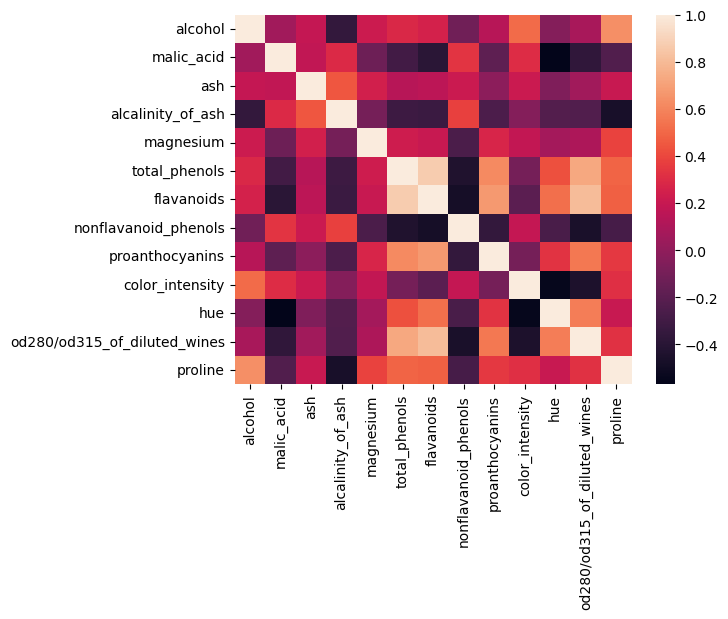

In [13]:
import seaborn as sns

sns.heatmap(X_train.corr())

In [19]:
# Base Model
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lin_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(dual='auto', random_state=42)
)

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

In [21]:
# Using a kernelized SVM
from sklearn.svm import SVC

svm_clf = make_pipeline(
    StandardScaler(),
    SVC(random_state=42)
)

cross_val_score(svm_clf, X_train, y_train).mean()

0.9698005698005698

In [26]:
svm_clf.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])>

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901188,
                     random_state=42))])

In [31]:
rnd_search_cv.best_score_

0.9925925925925926

In [30]:
import pandas as pd

svm_cv_results = pd.DataFrame(rnd_search_cv.cv_results_)
svm_cv_results.sort_values(by="mean_test_score", ascending=False, inplace=True)
svm_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
59,0.005756,0.000629,0.002119,0.000664,9.92559,0.011986,"{'svc__C': 9.925589984899778, 'svc__gamma': 0....",1.0,1.000000,0.962963,1.0,1.0,0.992593,0.014815,1
44,0.005433,0.002108,0.002610,0.000485,9.872127,0.008799,"{'svc__C': 9.872127425763265, 'svc__gamma': 0....",1.0,0.962963,0.962963,1.0,1.0,0.985185,0.018144,2
33,0.006075,0.002106,0.004429,0.001700,2.409242,0.040216,"{'svc__C': 2.4092422497476265, 'svc__gamma': 0...",1.0,0.962963,0.962963,1.0,1.0,0.985185,0.018144,2
47,0.004427,0.000793,0.002172,0.000419,8.709672,0.009718,"{'svc__C': 8.70967179954561, 'svc__gamma': 0.0...",1.0,0.962963,0.962963,1.0,1.0,0.985185,0.018144,2
81,0.004452,0.001251,0.002865,0.000520,7.335297,0.011791,"{'svc__C': 7.335297107608947, 'svc__gamma': 0....",1.0,0.962963,0.962963,1.0,1.0,0.985185,0.018144,2


In [32]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777